In [1]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.graph_objs as go

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('books_variation.xlsx')
df.head()

,title,date,price
0,The Immortals of Meluha,2019-01-24,254
1,The Immortals of Meluha,2019-01-25,254
2,The Immortals of Meluha,2019-01-26,296
3,The Immortals of Meluha,2019-01-27,221
4,The Immortals of Meluha,2019-01-28,221


In [3]:
book1 = df.loc[df['title'] == 'Rich Dad Poor DAD']
book1 = book1.drop(columns='title')
book1

,date,price
112,2019-01-24,189
113,2019-01-25,189
114,2019-01-26,270
115,2019-01-27,270
116,2019-01-28,310
117,2019-01-29,310
118,2019-01-30,310
119,2019-01-31,310
120,2019-02-01,310
121,2019-02-02,310


In [4]:
book1['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
indexed_book1 = book1.set_index(['date'])
indexed_book1.index

DatetimeIndex(['2019-01-24', '2019-01-25', '2019-01-26', '2019-01-27',
               '2019-01-28', '2019-01-29', '2019-01-30', '2019-01-31',
               '2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04',
               '2019-02-05', '2019-02-06'],
              dtype='datetime64[ns]', name='date', freq=None)

In [5]:
data = [go.Scatter(x= indexed_book1.index, y= indexed_book1.price)]
plot(data, filename='basic-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\basic-line.html'

In [6]:
#Determining rolling statistics
rollmean = indexed_book1.rolling(window='14d').mean()  #monthly basis
rollstd = indexed_book1.rolling(window='14d').std()
rollmean, rollstd

(                 price
 date                  
 2019-01-24  189.000000
 2019-01-25  189.000000
 2019-01-26  216.000000
 2019-01-27  229.500000
 2019-01-28  245.600000
 2019-01-29  256.333333
 2019-01-30  264.000000
 2019-01-31  269.750000
 2019-02-01  274.222222
 2019-02-02  277.800000
 2019-02-03  280.727273
 2019-02-04  283.166667
 2019-02-05  285.461538
 2019-02-06  284.357143,                 price
 date                 
 2019-01-24        NaN
 2019-01-25   0.000000
 2019-01-26  46.765372
 2019-01-27  46.765372
 2019-01-28  54.187637
 2019-01-29  55.138613
 2019-01-30  54.267854
 2019-01-31  52.808955
 2019-02-01  51.187835
 2019-02-02  49.568807
 2019-02-03  48.016853
 2019-02-04  46.555604
 2019-02-05  45.335077
 2019-02-06  43.752111)

In [7]:
#Plotting Rolling Statistics

trace1 = go.Scatter(x= indexed_book1.index, y= indexed_book1.price, name='Original')
trace2 = go.Scatter(x= rollmean.index , y= rollmean.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= rollstd.index , y= rollstd.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price')
              )
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [8]:
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(indexed_book1['price'], autolag='AIC')
dfout = pd.Series(dftest[0:4], index= ['Test statistic','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value
print(dfout)


Test statistic                -0.000000
p-value                        0.958532
lags used                      8.000000
number of observations used    5.000000
Critical value (1%)           -6.045114
Critical value (5%)           -3.929280
Critical value (10%)          -2.986810
dtype: float64


C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\base\model.py:1181: RuntimeWarning:

invalid value encountered in multiply



In [9]:
#The test statistic is positive, meaning we are much less likely to reject the null hypothesis (it looks non-stationary).
#Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis 
#that the time series is non-stationary and does have time-dependent structure.

In [10]:
#log transform the dataset to make the distribution of values more linear and better meet the expectations of this statistical test
import numpy as np
indexed_book1_logscale = np.log(indexed_book1)

data = [go.Scatter(x= indexed_book1_logscale.index, y= indexed_book1_logscale.price)]
plot(data, filename='line-mode')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `line-mode` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\line-mode.html'

In [11]:
# Moving Average with log timeseries

moving_avg = indexed_book1_logscale.rolling(window='14d').mean()
moving_std = indexed_book1_logscale.rolling(window='14d').std()
moving_avg, moving_std

(               price
 date                
 2019-01-24  5.241747
 2019-01-25  5.241747
 2019-01-26  5.360639
 2019-01-27  5.420084
 2019-01-28  5.483382
 2019-01-29  5.525580
 2019-01-30  5.555722
 2019-01-31  5.578328
 2019-02-01  5.595911
 2019-02-02  5.609977
 2019-02-03  5.621486
 2019-02-04  5.631076
 2019-02-05  5.639932
 2019-02-06  5.636967,                price
 date                
 2019-01-24       NaN
 2019-01-25  0.000000
 2019-01-26  0.205926
 2019-01-27  0.205926
 2019-01-28  0.227678
 2019-01-29  0.228372
 2019-01-30  0.223207
 2019-01-31  0.216315
 2019-02-01  0.209107
 2019-02-02  0.202103
 2019-02-03  0.195495
 2019-02-04  0.189334
 2019-02-05  0.184065
 2019-02-06  0.177191)

In [12]:
trace1 = go.Scatter(x= indexed_book1_logscale.index, y= indexed_book1_logscale.price)
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price)
data = [trace1, trace2]
plot(data, filename='basic-line')


C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\basic-line.html'

In [13]:
#Difference between log timeseries and moving average

logminusMA = indexed_book1_logscale - moving_avg
logminusMA

,price
date,
2019-01-24,0.000000
2019-01-25,0.000000
2019-01-26,0.237783
2019-01-27,0.178337
2019-01-28,0.253190
2019-01-29,0.210992
2019-01-30,0.180850
2019-01-31,0.158244
2019-02-01,0.140661


In [14]:
#Determining the Stationarity of data

moving_avg = logminusMA.rolling(window='14d').mean()
moving_std = logminusMA.rolling(window='14d').std()
    
trace1 = go.Scatter(x= logminusMA.index, y= logminusMA.price, name='Original')
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= moving_std.index , y= moving_std.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'))
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [15]:
print("Results of Dickey-Fuller test: ")
dftest = adfuller(logminusMA['price'], autolag='AIC')
dfout = pd.Series(dftest[0:4], index= ['Test statistic','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value
print(dfout)

Results of Dickey-Fuller test: 
Test statistic                -0.000000
p-value                        0.958532
lags used                      8.000000
number of observations used    5.000000
Critical value (1%)           -6.045114
Critical value (5%)           -3.929280
Critical value (10%)          -2.986810
dtype: float64


In [16]:
#Calculate the weighted average to see the trend
#DataFrame.ewm : Provides exponential weighted functions

weighted_avg = indexed_book1_logscale.ewm(com=0.5).mean()
weighted_avg

,price
date,
2019-01-24,5.241747
2019-01-25,5.241747
2019-01-26,5.488676
2019-01-27,5.562754
2019-01-28,5.679112
2019-01-29,5.717471
2019-01-30,5.730211
2019-01-31,5.734453
2019-02-01,5.735866


In [17]:
trace1 = go.Scatter(x= indexed_book1_logscale.index, y= indexed_book1_logscale.price)
trace2 = go.Scatter(x= weighted_avg.index , y= weighted_avg.price)
data = [trace1, trace2]
plot(data, filename='basic-line')

#As you can see, the trend is moving with the logged data with respect to time

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\basic-line.html'

In [18]:
#Difference between log timeseries and weighted average

logminusWA = indexed_book1_logscale - weighted_avg
print(logminusWA)

#Determining the Stationarity of data

moving_avg = logminusWA.rolling(window='14d').mean()
moving_std = logminusWA.rolling(window='14d').std()
    
trace1 = go.Scatter(x= logminusWA.index, y= logminusWA.price, name='Original')
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= moving_std.index , y= moving_std.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'))
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

               price
date                
2019-01-24  0.000000
2019-01-25  0.000000
2019-01-26  0.109746
2019-01-27  0.035667
2019-01-28  0.057460
2019-01-29  0.019101
2019-01-30  0.006361
2019-01-31  0.002120
2019-02-01  0.000707
2019-02-02  0.000235
2019-02-03  0.000078
2019-02-04  0.000026
2019-02-05  0.003219
2019-02-06 -0.048187


C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [19]:
print("Results of Dickey-Fuller test: ")
dftest = adfuller(logminusWA['price'], autolag='AIC')
dfout = pd.Series(dftest[0:4], index= ['Test statistic','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value
print(dfout)

Results of Dickey-Fuller test: 
Test statistic                -0.000000
p-value                        0.958532
lags used                      8.000000
number of observations used    5.000000
Critical value (1%)           -6.045114
Critical value (5%)           -3.929280
Critical value (10%)          -2.986810
dtype: float64


In [20]:
# No difference in the p-value from original data and weighted average data
# Here timeseries is not stationary

In [21]:
#Shifting the values

indexed_book1_logscale_diffshift = indexed_book1_logscale - indexed_book1_logscale.shift()

data = [go.Scatter(x= indexed_book1_logscale_diffshift.index, y= indexed_book1_logscale_diffshift.price)]
plot(data, filename='basic-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\basic-line.html'

In [22]:
indexed_book1_logscale_diffshift.dropna(inplace=True)

#Determining the Stationarity of data

moving_avg = indexed_book1_logscale_diffshift.rolling(window='14d').mean()
moving_std = indexed_book1_logscale_diffshift.rolling(window='14d').std()
    
trace1 = go.Scatter(x= indexed_book1_logscale_diffshift.index, y= indexed_book1_logscale_diffshift.price, name='Original')
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= moving_std.index , y= moving_std.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'))
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [23]:
print("Results of Dickey-Fuller test: ")
dftest = adfuller(indexed_book1_logscale_diffshift['price'], autolag='AIC')
dfout = pd.Series(dftest[0:4], index= ['Test statistic','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfout['Critical value (%s)'%key] = value
print(dfout)

# Here timeseries is stationary and null-hypothesis is rejected

Results of Dickey-Fuller test: 
Test statistic                -0.000000
p-value                        0.958532
lags used                      8.000000
number of observations used    4.000000
Critical value (1%)           -7.355441
Critical value (5%)           -4.474365
Critical value (10%)          -3.126933
dtype: float64


In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(indexed_book1_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

from plotly import tools

trace1 = go.Scatter(x= indexed_book1_logscale.index, y= indexed_book1_logscale.price, name='Original')
trace2 = go.Scatter(x= trend.index, y= trend.price, name='Trend')
trace3 = go.Scatter(x= seasonal.index, y= seasonal.price, name='Seasonality')
trace4 = go.Scatter(x= residual.index, y= residual.price, name='Residual')

fig = tools.make_subplots(rows=4, cols=1)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)
fig.append_trace(trace4, 4, 1)


fig['layout'].update(title='Stacked subplots')
plot(fig, filename='stacked-subplots')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]
[ (4,1) x4,y4 ]



C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `stacked-subplots` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\stacked-subplots.html'

In [25]:
#Residuals are irregualr in nature
#So checking noise stationarity

decomposed_logdata = residual
decomposed_logdata.dropna(inplace=True)

#Determining the Stationarity of data

moving_avg = decomposed_logdata.rolling(window='14d').mean()
moving_std = decomposed_logdata.rolling(window='14d').std()
    
trace1 = go.Scatter(x= decomposed_logdata.index, y= decomposed_logdata.price, name='Original')
trace2 = go.Scatter(x= moving_avg.index , y= moving_avg.price, name= 'Rolling Mean')
trace3 = go.Scatter(x= moving_std.index , y= moving_std.price, name= 'Rolling Std')
data = [trace1, trace2, trace3]
    # Edit the layout
layout = dict(title = 'Rolling Mean and Standard Deviation',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'))
fig = dict(data=data, layout=layout)
plot(fig, filename='styled-line')

C:\Users\Shefali\Anaconda3\lib\site-packages\plotly\offline\offline.py:635: UserWarning:

Your filename `styled-line` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\styled-line.html'

In [26]:
#ACF and PACF plots

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(indexed_book1_logscale_diffshift)
lag_pacf = pacf(indexed_book1_logscale_diffshift)
#lag_acf,lag_pacf

#ACF
#trace1 = go.Scatter(y= lag_acf, name='Autocorrelation Function', type='bar')
trace1 = {"y": lag_acf, "name": "Autocorrelation Function", "type": "bar"}
trace2 = {"y": lag_pacf, "name": "Partial Autocorrelation Function", "type": "bar"}
#trace2 = go.Scatter(y= lag_pacf, name='Partial Autocorrelation Function', type='bar')

data = [trace1, trace2]
layout = dict(title = 'ACF and PACF Plots')
fig = dict(data=data, layout=layout)
plot(fig)

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning:

invalid value encountered in sqrt

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1275: RuntimeWarning:

invalid value encountered in double_scalars



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\temp-plot.html'

In [27]:
#AR Model
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexed_book1_logscale, order= (3,1,0))
results_AR = model.fit(disp=-1)

print("Plotting AR Model...")
trace1 = go.Scatter(x= indexed_book1_logscale_diffshift.index, y= indexed_book1_logscale_diffshift.price, name='Original')
trace2 = go.Scatter(y=results_AR.fittedvalues, name='AR fitted values')

data = [trace1, trace2]
layout = dict(title = 'RSS: %.4f'%sum((results_AR.fittedvalues-indexed_book1_logscale_diffshift.price)**2))
fig = dict(data=data, layout=layout)
plot(fig)

Plotting AR Model...


C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Shefali\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Shefali\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, w

'file://C:\\Users\\Shefali\\Desktop\\PY Work\\temp-plot.html'

In [28]:
#MA Model
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexed_book1_logscale, order= (0,1,0))
results_MA = model.fit(disp=-1)

print("Plotting MA Model...")
trace1 = go.Scatter(x= indexed_book1_logscale_diffshift.index, y= indexed_book1_logscale_diffshift.price, name='Original')
trace2 = go.Scatter(y=results_MA.fittedvalues, name='MA fitted values')

data = [trace1, trace2]
layout = dict(title = 'RSS: %.4f'%sum((results_MA.fittedvalues-indexed_book1_logscale_diffshift.price)**2))
fig = dict(data=data, layout=layout)
plot(fig)

Plotting MA Model...


C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\Shefali\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



'file://C:\\Users\\Shefali\\Desktop\\PY Work\\temp-plot.html'

In [29]:
#AR Model is better as it has less RSS value than MA Model

In [30]:
prediction = pd.Series(results_AR.fittedvalues, copy=True)
print(prediction)

prediction_cumsum = prediction.cumsum()
print(prediction_cumsum)

date
2019-01-25    0.041983
2019-01-26    0.047808
2019-01-27   -0.000391
2019-01-28    0.284631
2019-01-29    0.011498
2019-01-30    0.116941
2019-01-31    0.013705
2019-02-01    0.010928
2019-02-02    0.010928
2019-02-03    0.010928
2019-02-04    0.010928
2019-02-05    0.010928
2019-02-06    0.010468
dtype: float64
date
2019-01-25    0.041983
2019-01-26    0.089791
2019-01-27    0.089400
2019-01-28    0.374031
2019-01-29    0.385529
2019-01-30    0.502470
2019-01-31    0.516175
2019-02-01    0.527104
2019-02-02    0.538032
2019-02-03    0.548960
2019-02-04    0.559888
2019-02-05    0.570817
2019-02-06    0.581285
dtype: float64


In [31]:
prediction_log = pd.Series(indexed_book1_logscale.price.ix[0], index = indexed_book1_logscale.index)
prediction_log = prediction_log.add(prediction_cumsum, fill_value=0)
prediction_log

C:\Users\Shefali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



date
2019-01-24    5.241747
2019-01-25    5.283730
2019-01-26    5.331538
2019-01-27    5.331147
2019-01-28    5.615778
2019-01-29    5.627276
2019-01-30    5.744217
2019-01-31    5.757922
2019-02-01    5.768851
2019-02-02    5.779779
2019-02-03    5.790707
2019-02-04    5.801635
2019-02-05    5.812564
2019-02-06    5.823032
dtype: float64

In [32]:
prediction_ARIMA = np.exp(prediction_log)

trace1 = go.Scatter(x= indexed_book1.index, y= indexed_book1.price, name='Original data')
trace2 = go.Scatter(y=prediction_ARIMA, name='prdiction')

data = [trace1, trace2]
layout = dict(title = "Predictions")
fig = dict(data=data, layout=layout)
plot(fig)

'file://C:\\Users\\Shefali\\Desktop\\PY Work\\temp-plot.html'

In [33]:
indexed_book1_logscale

,price
date,
2019-01-24,5.241747
2019-01-25,5.241747
2019-01-26,5.598422
2019-01-27,5.598422
2019-01-28,5.736572
2019-01-29,5.736572
2019-01-30,5.736572
2019-01-31,5.736572
2019-02-01,5.736572


(array([5.62380137, 5.52030731, 5.55268498, 5.48315794, 5.52017331,
        5.47663075, 5.51664632]),
 array([0.08813797, 0.1217047 , 0.19453534, 0.24386736, 0.31492044,
        0.37015274, 0.43829185]),
 array([[5.45105412, 5.79654862],
        [5.28177048, 5.75884413],
        [5.17140271, 5.93396724],
        [5.00518669, 5.96112918],
        [4.90294059, 6.13740602],
        [4.75114472, 6.20211678],
        [4.65761009, 6.37568255]]))

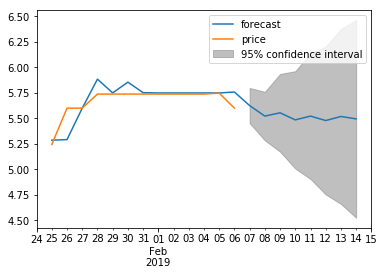

In [35]:
forecast = results_AR.forecast(steps=7)
#print(results_AR.forecast(steps=7))

results_AR.plot_predict(1,21)
results_AR.forecast(steps=7)